In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
#Scikit-learn for one hot encoding
# from sklearn.preprocessing import LabelEncoder

class DataPreprocessing:
        
    # Display datafile
    def display_data(self):
        self.file = input("Enter the file name:")

        file_exist = os.path.exists(self.file)
        # Exception Handling for file
        try:
            f = open(self.file, 'rb')
            # print("File exist", file_exist)
            self.df = pd.read_csv(self.file)
            print("\n",self.df)
            print("\nType of DF: ",type(self.df))
            print("\nData type of each column:\n",self.df.dtypes)
            # descibe dataframe
            print("\nDescribe Data: \n",self.df.describe())
            
        except FileNotFoundError as ex:
            print("\nInvalid file Name",ex)
        
    """Handling Missing Data"""
    def missing_data(self):
     
        # check null values in each column
        print("Null values in dataset:\n",self.df.isnull().sum())

        self.df['Age'].replace(np.NaN, self.df['Age'].mean(), inplace = True)
        # store data into other variable , otherwise put inplace= True to update dataset
        self.df.Salary = self.df['Salary'].replace(np.NaN, self.df['Salary'].mean())
        # mean= df['Age'].mean()
        # df1 = df['Age'].replace(np.NaN,mean)
        # print(df1)
        print("\n",self.df)
        
    """Handling categorical data"""
    def categorical_data(self):
        #For Purchased column
        self.df['Purchased_Dummy'] = self.df.Purchased.map({'Yes': 1 , 'No': 0})
        
        # For Country Column
          #create a set of dummy veriable       
        dummy = pd.get_dummies(self.df['Country'])
#         print("Categorical Data")
        print(dummy.head())
        # join dummy veriable to Df
        df_new = pd.concat([self.df,dummy], axis = 1)
        # mergw new DF to original one, must pass both left and right index as True
        self.df= self.df.merge(dummy, left_index = True ,right_index= True)        
   
        print("New Dataset")
        print(self.df)
        print("size of DF",len(self.df))
        
    def split_data(self):

        # 70 % training datset
        train_per = int(0.70*len(self.df))
        # 30% test dataset
        test_per = len(self.df)-train_per
        X_train_set = self.df.head(train_per)
        Y_train_set = self.df.tail(test_per)
        print("\nTraining data set\n",X_train_set)
        print("\nTest data set\n",Y_train_set)
        
        
    def check_outliers(self):
        self.df.boxplot()
#         sb.boxplot(data=self.df, x="Age", y="Purchased")
#         plt.title("BOX PLOT")
        plt.show()
    
    def feature_scaling(self):
#         #using standardization      
#         for name in self.df.columns:
#             if 'Purchased' == name or 'Country' == name :    
#                 pass
#             else:
# #                 temp = 0
# #                 temp_arr = np.array([])
#                 self.df[name] = (self.df[name] - self.df[name].mean()) / np.nanstd(self.df[name])
#         print(self.df)
        
        print("\n BY Simple Feature Scalling ")
#         self.df['Age']=np.divide(self.df['Age'], self.df.['Age'].max())
        self.df['Age']=self.df['Age']/self.df['Age'].max()
        self.df['Salary']=np.divide(self.df['Salary'], self.df['Salary'].max())
        print(self.df)
        
        print("\n By Normalization Method ")
        self.df['Age'] = np.divide((self.df['Age'] - self.df['Age'].min()), (self.df['Age'].max() - self.df['Age'].min()))
        self.df['Salary'] = (self.df['Salary'] - self.df['Salary'].min())/(self.df['Salary'].max() - self.df['Salary'].min())
        print(self.df)
                                      
        print("\n By Z score Method ")
        self.df['Age'] = np.divide((self.df['Age'] - self.df['Age'].mean()), self.df['Age'].std())
        self.df['Salary'] =  np.divide((self.df['Salary'] - self.df['Salary'].mean()),self.df['Salary'].std())
        print(self.df)

# class Object created to call its method
obj = DataPreprocessing()


In [2]:
print("\n----------Show dataset details:----------")
obj.display_data()


----------Show dataset details:----------
Enter the file name:data_preprocessing.csv

    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

Type of DF:  <class 'pandas.core.frame.DataFrame'>

Data type of each column:
 Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

Describe Data: 
              Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000


In [3]:
print("\n----------Handling Missing Data:----------")
obj.missing_data()


----------Handling Missing Data:----------
Null values in dataset:
 Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

    Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


In [4]:
print("\n----------Handling Categorical data:----------")
obj.categorical_data()


----------Handling Categorical data:----------
   France  Germany  Spain
0       1        0      0
1       0        0      1
2       0        1      0
3       0        0      1
4       0        1      0
New Dataset
   Country        Age        Salary Purchased  Purchased_Dummy  France  \
0   France  44.000000  72000.000000        No                0       1   
1    Spain  27.000000  48000.000000       Yes                1       0   
2  Germany  30.000000  54000.000000        No                0       0   
3    Spain  38.000000  61000.000000        No                0       0   
4  Germany  40.000000  63777.777778       Yes                1       0   
5   France  35.000000  58000.000000       Yes                1       1   
6    Spain  38.777778  52000.000000        No                0       0   
7   France  48.000000  79000.000000       Yes                1       1   
8  Germany  50.000000  83000.000000        No                0       0   
9   France  37.000000  67000.000000       Ye

In [5]:
print("Split Dataset into training and test dataset:\n")
obj.split_data()

Split Dataset into training and test dataset:


Training data set
    Country        Age        Salary Purchased  Purchased_Dummy  France  \
0   France  44.000000  72000.000000        No                0       1   
1    Spain  27.000000  48000.000000       Yes                1       0   
2  Germany  30.000000  54000.000000        No                0       0   
3    Spain  38.000000  61000.000000        No                0       0   
4  Germany  40.000000  63777.777778       Yes                1       0   
5   France  35.000000  58000.000000       Yes                1       1   
6    Spain  38.777778  52000.000000        No                0       0   

   Germany  Spain  
0        0      0  
1        0      1  
2        1      0  
3        0      1  
4        1      0  
5        0      0  
6        0      1  

Test data set
    Country   Age   Salary Purchased  Purchased_Dummy  France  Germany  Spain
7   France  48.0  79000.0       Yes                1       1        0      0
8  Germany

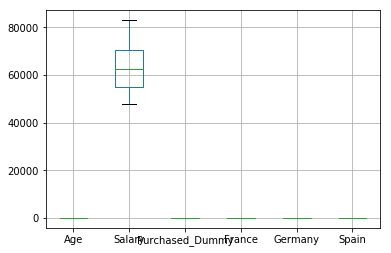

In [6]:
obj.check_outliers()

In [7]:
obj.feature_scaling()


 BY Simple Feature Scalling 
   Country       Age    Salary Purchased  Purchased_Dummy  France  Germany  \
0   France  0.880000  0.867470        No                0       1        0   
1    Spain  0.540000  0.578313       Yes                1       0        0   
2  Germany  0.600000  0.650602        No                0       0        1   
3    Spain  0.760000  0.734940        No                0       0        0   
4  Germany  0.800000  0.768407       Yes                1       0        1   
5   France  0.700000  0.698795       Yes                1       1        0   
6    Spain  0.775556  0.626506        No                0       0        0   
7   France  0.960000  0.951807       Yes                1       1        0   
8  Germany  1.000000  1.000000        No                0       0        1   
9   France  0.740000  0.807229       Yes                1       1        0   

   Spain  
0      0  
1      1  
2      0  
3      1  
4      0  
5      0  
6      1  
7      0  
8      0  
9